In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, BatchNormalization, Dropout

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Datasets/age_gender.csv"
df = pd.read_csv(path)

In [3]:
# Data Preprocessing
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
X = np.array(df['pixels'].tolist())
X = X.reshape(X.shape[0], 48, 48, 1)
y = df['gender']

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Model architecture
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=[48, 48, 1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 47, 32)        96        
                                                                 
 batch_normalization (Batch  (None, 48, 47, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 48, 47, 32)        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 46, 64)        4160      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 46, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 48, 46, 64)        0

Epoch 1/2
593/593 [==============================] - 136s 226ms/step - loss: 0.9454 - accuracy: 0.7189 - val_loss: 0.3623 - val_accuracy: 0.8273
Epoch 2/2
593/593 [==============================] - 135s 227ms/step - loss: 0.3981 - accuracy: 0.8028 - val_loss: 0.3110 - val_accuracy: 0.8572


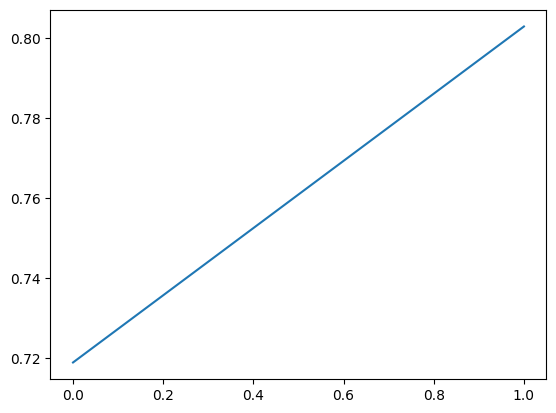

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))

# Plotting the accuracy and loss curves
plt.plot(history.history['accuracy'], label='train_accuracy')

<Axes: xlabel='age', ylabel='count'>

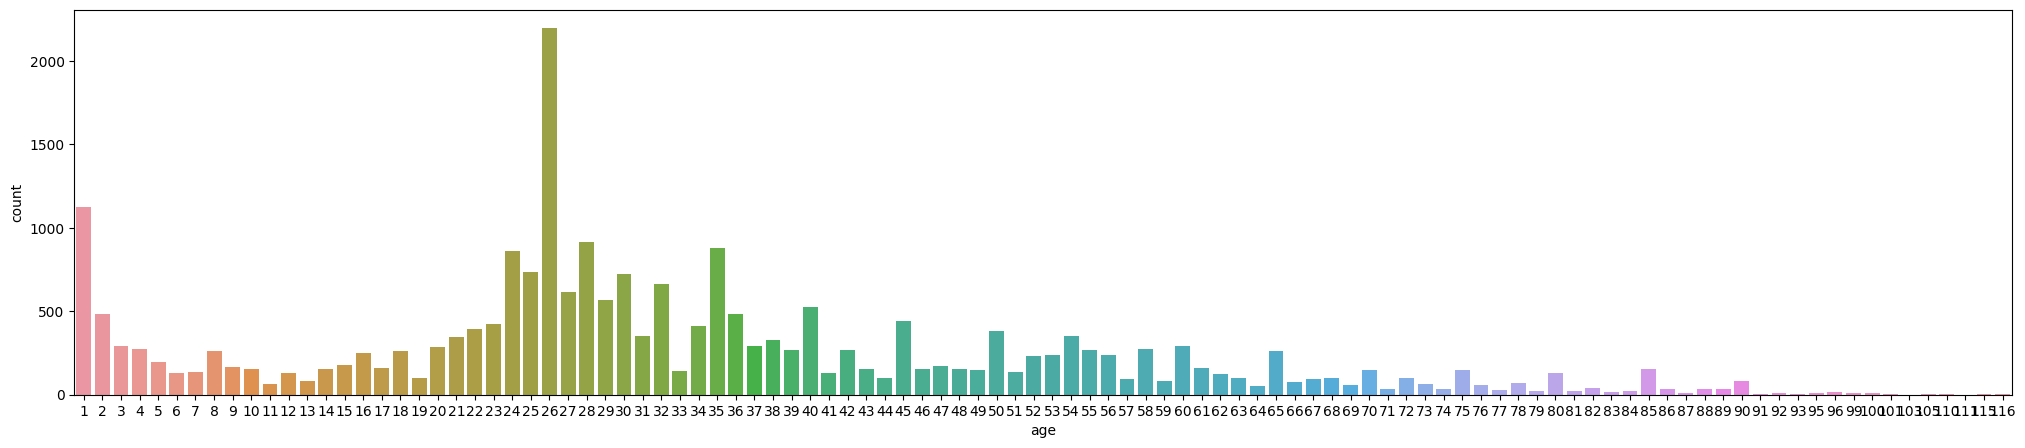

In [7]:
plt.figure(figsize = (25, 5))
sns.countplot(x='age', data = df)

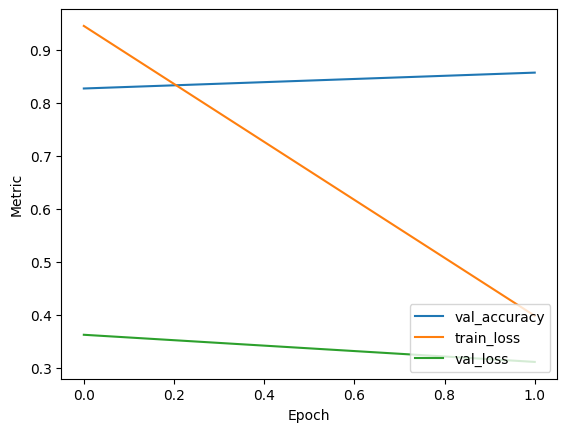

In [8]:
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend(loc='lower right')
plt.show()